#                                                     EDA JORGE DUQUE





![imagen](plataforma-streaming.jpg)


# CAMBIO DE HABITOS CON LA LLEGADA DE LAS PLATAFORMAS EN STREAMING


En este EDA lo que queremos es analizar qué ha cambiado con la llegada de las plataformas en streaming a la vida diaria de los hogares españoles. Para eso nos hemos basado en varias fuentes de datos que iremos describiendo.

Las plataformas de streaming comenzaron a implantarse en España en modo masivo sobre el 2010, aunque fué a raíz de la pandemia cuando el número de abonados ha subido de una forma exponencial.

En este momento Netflix es de las más populares e implantadas y sus producciones son de las más vistas.

En este análisis queremos ver varias cosas:

    1. Cómo ha variado la audiencia para las TVs generalistas con la competencia de la TV en Streaming
    2. Cómo se han modificado los flujos de la publicidad.
    3. La "democratización" de los contenidos audiovisuales.
    4. ¿La TV ha cambiado la vida de las personas o las personas han cambiado la vida de la TV?


Lo irems viendo según avancemos con los gráficos para explicarlo mejor.

Vamos a importar las librerías que necesitamos para realizar todo nuestro análisis.

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
import squarify
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot


Nos importamos los datasets.

Los Datasets los he bajado de las siguientes páginas:



[Netflix](https://www.kaggle.com/shivamb/netflix-shows)

[Disney+](https://www.kaggle.com/shivamb/disney-movies-and-tv-shows)

[Amazon](https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows)

[HBO](https://www.kaggle.com/rishidamarla/hbo-tv-shows-documentaries-movies-as-of-2020)

In [183]:
df_netflix = pd.read_csv('netflix_titles.csv')
df_disney = pd.read_csv("disney_plus_titles.csv")
df_amazon = pd.read_csv("amazon_prime_titles.csv")
df_hbo = pd.read_csv("HBO_MAX_Content.csv")

Limpiamos las columnas que no nos interesan ya que no nos aportan nada.

En la función sólo incluimos Netflix, Disney+ y Amazon ya que la limpieza de HBO es un poco más complicada.

In [184]:
def limpieza(x):
    x.drop(["show_id", "director", "cast", "release_year", "duration", "director", "description"], axis = 1, inplace=True)

limpieza(x=df_netflix)
limpieza(x=df_disney)
limpieza(x=df_amazon)

En estos DF le vamos a agregar una columna identificando la plataforma a la que pertenecen estos DF para poder realizar un "merge" a los DF de las 4 plataformas y poder analizarlo desde un sólo DF.

In [185]:
df_netflix["Platform"] = "Netflix"
df_disney["Platform"] = "Disney+"
df_amazon["Platform"] = "Amazon"

Ahora vamos a Realizar la limpieza del Dataset de HBO que ha sido la que me ha complicado más el análisis.


En este DataSet ha una columna por cada género y en cada una de las producciones aparece un 1 si es que coincide con ese género. Quería dejar una columna para el género tal y cómo aparece en los demás DataSets.

In [186]:
df_hbo.head()

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Lord of the Rings: The Fellowship of the Ring,NaN,2001,PG-13/TV-14,8.8,91.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Fight Club,NaN,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Two Towers,NaN,2002,PG-13/TV-14,8.7,95.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0


Lo que necesito es que haya una colummna llamada "gender" en la que apareciera el género de cada película y eliminar el restop de colunnas. Para eso se debe de recorrer todas las filas de cada una de las colunnas. Esta operación debe de realizarse en varias fases.


La primera fase es renombrar las columnas de género:

In [187]:
df_hbo = df_hbo.rename(columns={'genres_Action_Adventure': "Action Adventure", 'genres_Animation': "Animation",
       'genres_Anime': "Anime", 'genres_Biography': "Biography", 'genres_Children':"Children", 'genres_Comedy':"Comedy",
       'genres_Crime': "Crime", 'genres_Cult': "Cult", 'genres_Documentary': "Documentary", 'genres_Drama':"Drama",
       'genres_Family': "Family", 'genres_Fantasy':"Fantasy",
       'genres_History':"History", 'genres_Horror': "Horror",
       'genres_Independent':"Independent", 'genres_LGBTQ': "LGBTQ", 'genres_Musical':"Musical",
       'genres_Mystery':"Mystery", 'genres_Reality': "Reality", 'genres_Romance':"Romance",
       'genres_Science_Fiction':"Science_Fiction", 'genres_Sport':"Sport", 'genres_Thriller':"Thriller", 'genres_Travel':"Travel"})

Tendremos que crear una lista con los nombres de los géneros.

In [188]:
list_genders = ['Action Adventure', 'Animation', 'Anime',
       'Biography', 'Children', 'Comedy', 'Crime', 'Cult', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'genres_Food', 'genres_Game Show',
       'History', 'genres_Home_Garden', 'Horror', 'Independent', 'LGBTQ',
       'Musical', 'Mystery', 'Reality', 'Romance', 'Science_Fiction', 'Sport',
       'genres_Stand_up_Talk', 'Thriller', 'Travel']

Cuando las hemos renombrado, debemos de iterar cada fila de cada columna para que, cuando encuentre un 1 deberemos de sustituirlo por el nombre de la columna ya modificada.

In [189]:
def cambio_1(x):
    if x == 1:
        x = i
    else:
        x = ""
    return x

for i in list_genders:
    df_hbo[i] = df_hbo[i].apply(cambio_1)

Cuando tengamos en cada una de las filas el nombre correspondiente al género, las vamos sumando ya que muchas líneas no pertenecen a un sólo género. Cuando lo sumemos lo llevamos a la columna que hemos generado nueva llamada "genders"

In [190]:
for i in list_genders:
    df_hbo[i] = df_hbo[i] + " " 

In [191]:
df_hbo["listed_in"] = df_hbo["Action Adventure"] + df_hbo["Animation"] + df_hbo["Anime"] + df_hbo["Biography"] + df_hbo["Children"] + df_hbo["Comedy"] + df_hbo["Crime"] + df_hbo["Cult"] + df_hbo["Documentary"] + df_hbo["Drama"] + df_hbo["Family"] + df_hbo["Fantasy"] + df_hbo["History"] + df_hbo["Horror"] + df_hbo["Independent"] + df_hbo["LGBTQ"] + df_hbo["Musical"] + df_hbo["Mystery"] + df_hbo["Reality"] + df_hbo["Romance"] + df_hbo["Science_Fiction"] + df_hbo["Sport"] + df_hbo["Thriller"] + df_hbo["Travel"]

Ahora vamos a eliminar las columnas de cada uno de los géneros, para dejar esa información en la columna genders. También eliminamos las columnas que se refieren a otras plataformas y a otras informaciones que no nos aportan nada a nuestro análisis.

In [192]:
df_hbo = df_hbo.drop(['Action Adventure', 'Animation', 'Anime',
       'Biography', 'Children', 'Comedy', 'Crime', 'Cult', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'genres_Food', 'genres_Game Show',
       'History', 'genres_Home_Garden', 'Horror', 'Independent', 'LGBTQ',
       'Musical', 'Mystery', 'Reality', 'Romance', 'Science_Fiction', 'Sport',
       'genres_Stand_up_Talk', 'Thriller', 'Travel', 'platforms_acorntv','imdb_score', 'rotten_score',
       'decade', 'imdb_bucket', 'platforms_adult_swim_tveverywhere',
       'platforms_amazon_prime', 'platforms_amc', 'platforms_amc_premiere',
       'platforms_bbc_america_tve', 'platforms_britbox',
       'platforms_cartoon_network', 'platforms_cbs_all_access',
       'platforms_cinemax', 'platforms_comedycentral_tveverywhere',
       'platforms_criterion_channel', 'platforms_crunchyroll_premium',
       'platforms_curiositystream', 'platforms_dc_universe', 'platforms_epix',
       'platforms_fandor', 'platforms_free', 'platforms_fubo_tv',
       'platforms_funimation', 'platforms_hbo', 'platforms_hbo_max',
       'platforms_hoopla', 'platforms_hulu_plus', 'platforms_kanopy',
       'platforms_nbc_tveverywhere', 'platforms_netflix',
       'platforms_shoutfactorytv', 'platforms_showtime', 'platforms_shudder',
       'platforms_starz', 'platforms_sundancenow',
       'platforms_syfy_tveverywhere', 'platforms_tbs', 'platforms_tnt',
       'platforms_trutv_tveverywhere', 'platforms_urbanmoviechannel',
       'platforms_velocity_go', 'platforms_watch_tcm'], axis=1)

In [193]:
df_hbo.columns

Index(['title', 'type', 'year', 'rating', 'listed_in'], dtype='object')

Y vemos cómo se ha quedado el DF.

In [194]:
df_hbo.head()

,title,type,year,rating,listed_in
0,Game of Thrones,TV,2011,R/TV-MA,Action Adventure Drama Fantasy ...
1,Rick and Morty,TV,2013,R/TV-MA,Action Adventure Animation Comedy Fant...
2,The Lord of the Rings: The Fellowship of the Ring,NaN,2001,PG-13/TV-14,Action Adventure Drama Fantasy ...
3,Fight Club,NaN,1999,R/TV-MA,Cult Drama
4,The Lord of the Rings: The Two Towers,NaN,2002,PG-13/TV-14,Action Adventure Drama Fantasy ...


En este mismo DataFrame vamos a ver cómo están los datos.

In [195]:
df_hbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2087 non-null   object
 1   type       375 non-null    object
 2   year       2087 non-null   int64 
 3   rating     1537 non-null   object
 4   listed_in  2087 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.6+ KB


En el DF de HBO encontramos que en la parte de type sólo tenemos del tipo de TV Show, el resto estña cómo NaN cuando debería de estar cómo Movie. 

Vamos a cambiar estos datos.

Primero cambiamos el NaN por "Movie", creando una lista nueva llamada type_fixed.

In [196]:
df_hbo["type"] = np.where(df_hbo["type"].isna(), "Movie", df_hbo["type"])

Vamos a cambiar el nombre de la columna "year" del DF de HBO  a "date_added para equipararlo a las columnas de los demás DF.

In [197]:
df_hbo = df_hbo.rename(columns={'year': "date_added", "genders": "listed_in"})

In [198]:
df_hbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       2087 non-null   object
 1   type        2087 non-null   object
 2   date_added  2087 non-null   int64 
 3   rating      1537 non-null   object
 4   listed_in   2087 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.6+ KB


In [199]:
def to_date(df):
    df["date_added"] = pd.to_datetime(df["date_added"])
to_date(df=df_hbo)
to_date(df=df_netflix)
to_date(df=df_disney)
to_date(df=df_amazon)

In [200]:
df_platforms1 = pd.merge(df_hbo, df_netflix, how="outer")
df_platforms2 = pd.merge(df_disney, df_amazon, how="outer")
df_platforms = pd.merge(df_platforms1, df_platforms2, how="outer")

In [201]:
df_hbo

,title,type,date_added,rating,listed_in
0,Game of Thrones,TV,1970-01-01 00:00:00.000002011,R/TV-MA,Action Adventure Drama Fantasy ...
1,Rick and Morty,TV,1970-01-01 00:00:00.000002013,R/TV-MA,Action Adventure Animation Comedy Fant...
2,The Lord of the Rings: The Fellowship of the Ring,Movie,1970-01-01 00:00:00.000002001,PG-13/TV-14,Action Adventure Drama Fantasy ...
3,Fight Club,Movie,1970-01-01 00:00:00.000001999,R/TV-MA,Cult Drama
4,The Lord of the Rings: The Two Towers,Movie,1970-01-01 00:00:00.000002002,PG-13/TV-14,Action Adventure Drama Fantasy ...
...,...,...,...,...,...
2082,Mystery Signal From Space,Movie,1970-01-01 00:00:00.000002018,NaN,
2083,The Norwegian Fjords,Movie,1970-01-01 00:00:00.000002018,NaN,
2084,Mandrake Telefilm: Part 1,Movie,1970-01-01 00:00:00.000002013,NaN,
2085,What Animals See,Movie,1970-01-01 00:00:00.000002018,NaN,


In [202]:
df_platforms

,title,type,date_added,rating,listed_in,country,Platform
0,Game of Thrones,TV,1970-01-01 00:00:00.000002011,R/TV-MA,Action Adventure Drama Fantasy ...,NaN,NaN
1,Rick and Morty,TV,1970-01-01 00:00:00.000002013,R/TV-MA,Action Adventure Animation Comedy Fant...,NaN,NaN
2,The Lord of the Rings: The Fellowship of the Ring,Movie,1970-01-01 00:00:00.000002001,PG-13/TV-14,Action Adventure Drama Fantasy ...,NaN,NaN
3,Fight Club,Movie,1970-01-01 00:00:00.000001999,R/TV-MA,Cult Drama,NaN,NaN
4,The Lord of the Rings: The Two Towers,Movie,1970-01-01 00:00:00.000002002,PG-13/TV-14,Action Adventure Drama Fantasy ...,NaN,NaN
...,...,...,...,...,...,...,...
21925,Pride Of The Bowery,Movie,NaT,7+,Comedy,NaN,Amazon
21926,Planet Patrol,TV Show,NaT,13+,TV Shows,NaN,Amazon
21927,Outpost,Movie,NaT,R,Action,NaN,Amazon
21928,Maradona: Blessed Dream,TV Show,NaT,TV-MA,"Drama, Sports",NaN,Amazon


El DataFrame de HBO está limpio. Revisamos cómo quedan los datos.

In [203]:
df_hbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       2087 non-null   object        
 1   type        2087 non-null   object        
 2   date_added  2087 non-null   datetime64[ns]
 3   rating      1537 non-null   object        
 4   listed_in   2087 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 81.6+ KB


Le agragamos una columna para indicarle la plataforma, así podremos hacer un "merge" con el resto de DF de las otras plataformas.

In [204]:
df_hbo["Platform"] = "HBO"

Ahora vamos a revisar cómo quedan el resto de DataFrames.

In [205]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        9668 non-null   object        
 1   title       9668 non-null   object        
 2   country     672 non-null    object        
 3   date_added  155 non-null    datetime64[ns]
 4   rating      9331 non-null   object        
 5   listed_in   9668 non-null   object        
 6   Platform    9668 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 528.8+ KB


Vemos en los títulos de Amazon que no tenemos datos del país de 9000 líneas. De ese dato no vamos a poder sacar nada, por lo menos de Amazon. Tampoco tenemos muchos datos sobre la fecha en la que se subió a la plataforma.

In [206]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        1368 non-null   object        
 1   title       1368 non-null   object        
 2   country     1193 non-null   object        
 3   date_added  1365 non-null   datetime64[ns]
 4   rating      1366 non-null   object        
 5   listed_in   1368 non-null   object        
 6   Platform    1368 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 74.9+ KB


Del DataFrame de Disney no tenemos datos de unos 175 líneas sobre el país, no es un número demasiado relevante y sí que podremos sacar conclusiones de dónde se han realizado las producciones.

In [207]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        8807 non-null   object        
 1   title       8807 non-null   object        
 2   country     7976 non-null   object        
 3   date_added  8797 non-null   datetime64[ns]
 4   rating      8803 non-null   object        
 5   listed_in   8807 non-null   object        
 6   Platform    8807 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 481.8+ KB


Vemos a unir todas las plataformas de TV en un sólo DF utilizando un "merge".

In [208]:
df_platforms1 = pd.merge(df_netflix, df_disney, how="outer")
df_platforms2 = pd.merge(df_amazon, df_hbo, how="outer")
df_platforms = pd.merge(df_platforms1, df_platforms2, how="outer")
df_platforms.head()

,type,title,country,date_added,rating,listed_in,Platform
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,PG-13,Documentaries,Netflix
1,TV Show,Blood & Water,South Africa,2021-09-24,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Netflix
2,TV Show,Ganglands,NaN,2021-09-24,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Netflix
3,TV Show,Jailbirds New Orleans,NaN,2021-09-24,TV-MA,"Docuseries, Reality TV",Netflix
4,TV Show,Kota Factory,India,2021-09-24,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Netflix


Vemos que de la columna "Country" hay casi 1000 filas que no tenemos datos, veremos cómo se tratan estas columnas y si podemos encontrar los datos de una forma fácil. 

De la columna "date_added" hay 10 filas sin datos y de la columna "rating" hay 4 filas sin dato, no vemos que sea relevante ni que vaya a corrommper los resultados de nuestro análisis.

Ahora nos bajamos los demás datos que necesitamos para completar el análisis.

Estos datasets los hemos conseguido en la siguiente página:


[Abonados TV de pago en España por modalidades]("https://www.epdata.es/abonados-television-pago-espana-modalidades/618e0880-a68e-41cc-ae39-1a9071281166")

[Evolución de la TV de pago en España](https://www.epdata.es/evolucion-television-pago-espana/f11bc555-1808-40d2-8788-93710f7a2543)

[Evolucion de los minutos de television por persona al dia en España]("https://www.epdata.es/evolucion-minutos-television-persona-dia-espana/b677099a-9e5c-4ff9-a1b2-f3cd8934e333)

[Inversión Publicitaria Enero-Marzo (2019-2021)]("https://ipmark.com/digital-radio-y-tv-registran-en-marzo-crecimientos-en-inversion-publicitaria/)



In [209]:
df_abonadosTV = pd.read_csv("abonados_a_la_television_de_pago_en_españa_por_modalidades.csv", sep=";")
df_evoluTV = pd.read_csv("evolucion_de_la_television_de_pago_en_españa.csv", sep=";")
df_evolumin = pd.read_csv("evolucion_de_los_minutos_de_television_por_persona_al_dia_en_españa.csv", sep=";")
df_evoconsum = pd.read_csv("asi_ha_aumentado_el_consumo_de_television_en_españa.csv", sep=";")
df_audiencias = pd.read_excel("Audiencias TV.xlsx")
df_publi = pd.read_excel("Inversion publicitaria.xlsx")

In [210]:
df_evoconsum

,Año,Periodo,Consumo de TV
0,1992,Año,192.0
1,1993,Año,204.0
2,1994,Año,210.0
3,1995,Año,211.0
4,1996,Año,214.0
5,1997,Año,209.0
6,1998,Año,210.0
7,1999,Año,213.0
8,2000,Año,210.0
9,2001,Año,208.0


Vamos a comenzar a limpiar.

Del DF de Abonados a la TV, Evolución de los min de TV y la evolución de la TV limpiaremos algunos datos que venían en las últimas líneas del documento.

In [211]:
df_abonadosTV = df_abonadosTV.drop(range(57, 116), axis=0)
df_evoluTV = df_evoluTV.drop(range(15, 47), axis=0)
df_evolumin = df_evolumin.drop(range(31, 43), axis=0)
df_evoconsum = df_evoconsum.drop(range(29, 42), axis=0)

Vamos a ver de cada uno de los DF qué tipo de datos tenemos y si hay algo más que limpiar.

In [151]:
df_abonadosTV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   57 non-null     object 
 1   Periodo               57 non-null     object 
 2   Televisión IP         57 non-null     float64
 3   Televisión por cable  57 non-null     float64
 4   Televisión satélite   57 non-null     float64
 5   Televisión online     57 non-null     float64
 6   Televisión terrestre  57 non-null     float64
 7   TV móvil              57 non-null     float64
dtypes: float64(6), object(2)
memory usage: 4.0+ KB


In [152]:
df_evoconsum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            29 non-null     object 
 1   Periodo        29 non-null     object 
 2   Consumo de TV  29 non-null     float64
dtypes: float64(1), object(2)
memory usage: 928.0+ bytes


In [153]:
df_audiencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cadena            23 non-null     object 
 1   Enero             23 non-null     object 
 2   Febrero           23 non-null     object 
 3   Marzo             23 non-null     object 
 4   Abril             23 non-null     object 
 5   Mayo              23 non-null     object 
 6   Junio             23 non-null     object 
 7   Julio             23 non-null     float64
 8   Agosto            23 non-null     float64
 9   Sept.             23 non-null     float64
 10  Octubre           23 non-null     float64
 11  Noviembre         23 non-null     float64
 12  Diciembre         23 non-null     float64
 13  Media anual 2015  23 non-null     object 
 14  Media anual 2020  22 non-null     float64
dtypes: float64(7), object(8)
memory usage: 2.8+ KB


In [154]:
df_audiencias.head(2)

,Cadena,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Sept.,Octubre,Noviembre,Diciembre,Media anual 2015,Media anual 2020
0,Telecinco,0.142,0.154,0.153,0.148,0.154,0.152,0.146,0.132,0.149,0.151,0.151,0.144,"14,8%*",1460.0
1,Antena 3,0.138,0.132,0.134,0.139,0.13,0.131,0.126,0.130,0.134,0.140,0.143,0.134,"13,4%*",11.8


Vemos que hay una línea que aparece NaN, la borramos ya que no nos aporta nada.

In [155]:
df_audiencias = df_audiencias.drop(0, axis=0)
df_audiencias.head(2)

,Cadena,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Sept.,Octubre,Noviembre,Diciembre,Media anual 2015,Media anual 2020
1,Antena 3,0.138,0.132,0.134,0.139,0.13,0.131,0.126,0.13,0.134,0.14,0.143,0.134,"13,4%*",11.8
2,La 1,0.104,0.102,0.1,0.099,0.099,0.097,0.090,0.09,0.097,0.10,0.097,0.102,"9,8%*",9.3


In [156]:
df_evolumin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              29 non-null     object 
 1   Periodo          29 non-null     object 
 2   Lineal+Diferido  29 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [157]:
df_publi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Medio        37 non-null     object 
 1   Mes          37 non-null     object 
 2   2019         37 non-null     float64
 3   2020         37 non-null     float64
 4   2021         37 non-null     float64
 5   % ev. 21/20  37 non-null     object 
 6   % ev. 21/19  37 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.1+ KB


In [158]:
df_evoluTV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Año                                                                              15 non-null     object
 1   Periodo                                                                          15 non-null     object
 2   TV de pago                                                                       15 non-null     object
 3   Plataformas tradicionales (Movistar TV, Vodafone TV, Euskatel TV, Jazztel, etc)  15 non-null     object
 4   OTT'S (Netflix, Amazone Prime Video, HBO, etc)                                   15 non-null     object
dtypes: object(5)
memory usage: 720.0+ bytes


In [159]:
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21930 entries, 0 to 21929
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        21930 non-null  object        
 1   title       21930 non-null  object        
 2   country     9841 non-null   object        
 3   date_added  12404 non-null  datetime64[ns]
 4   rating      21037 non-null  object        
 5   listed_in   21930 non-null  object        
 6   Platform    21930 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.3+ MB


Vamos a analizar los datos. 

Queremos ver el volumen de producciones por plataforma:

Primero agrupamos por plataforma y hacemos que se cuenten las líneas ya que cada línea es una producción.

In [160]:
df_platforms_PL = df_platforms.groupby(["Platform"], as_index=False).count()
df_platforms_PL

,Platform,type,title,country,date_added,rating,listed_in
0,Amazon,9668,9668,672,155,9331,9668
1,Disney+,1368,1368,1193,1365,1366,1368
2,HBO,2087,2087,0,2087,1537,2087
3,Netflix,8807,8807,7976,8797,8803,8807


Creamos la gráfica de barras, ya que con la de "pie" no quedaba demasiado claro, la diferencia de producciones de Netflix y Amazon no se  apreciaba.

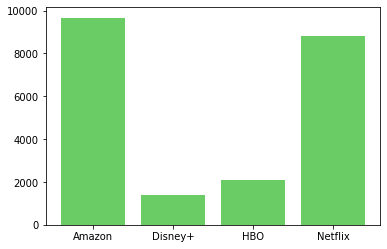

In [161]:
# Definimos los ejes:
x= df_platforms_PL["title"]
y= df_platforms_PL["Platform"]
# Elegimos la gráfica
plt.bar(y, x, color="g")
# Pedimos que nos la enseñe
plt.show()

In [162]:
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21930 entries, 0 to 21929
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        21930 non-null  object        
 1   title       21930 non-null  object        
 2   country     9841 non-null   object        
 3   date_added  12404 non-null  datetime64[ns]
 4   rating      21037 non-null  object        
 5   listed_in   21930 non-null  object        
 6   Platform    21930 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.3+ MB


Queremos ver en cada plataforma, qué países ha habido más producciones.

Lo veremos en una gráfica Squarity de la librería Seaborn.

In [163]:
# Agrupamos los países y realizamos un "count" ya que cada línea es una producción
c_countries_netflix = df_netflix.groupby("country").count()['type'].sort_values(ascending=False)[:15] 
c_countries_netflix

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: type, dtype: int64

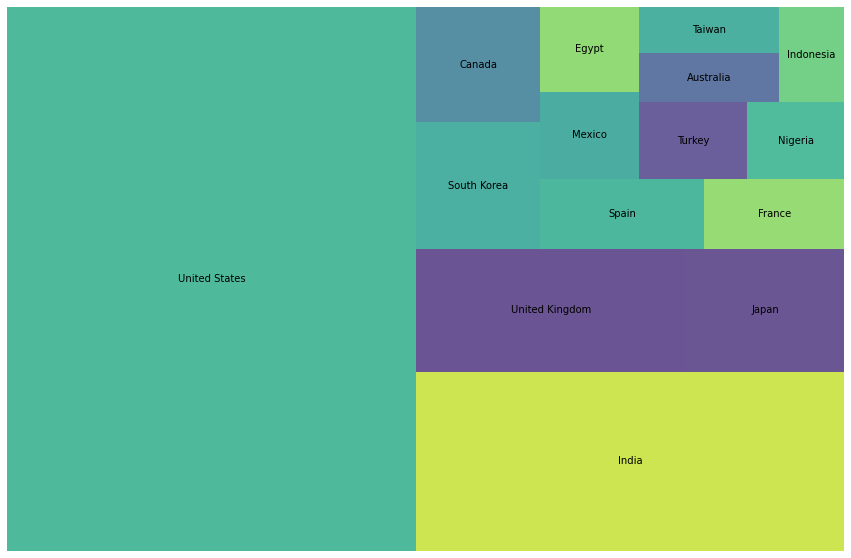

In [164]:
plt.figure(figsize=(15,10))

squarify.plot(sizes=c_countries_netflix.values,
             label=c_countries_netflix.index,
             alpha=.8)
             
plt.axis('off')
plt.show()

In [165]:
c_countries_disney = df_disney.groupby(["country"], as_index=False).count().sort_values("type", ascending=False)[:10]


In [166]:
c_countries_disney

,country,type,title,date_added,rating,listed_in,Platform
43,United States,976,976,974,976,976,976
48,"United States, Canada",28,28,28,28,28,28
31,United Kingdom,23,23,23,23,23,23
79,"United States, United Kingdom",19,19,19,19,19,19
8,"Canada, United States",17,17,17,17,17,17
38,"United Kingdom, United States",14,14,14,14,14,14
45,"United States, Australia",7,7,7,7,7,7
6,Canada,5,5,4,5,5,5
65,"United States, Japan",4,4,4,4,4,4
55,"United States, France",4,4,4,4,4,4


<AxesSubplot:xlabel='type', ylabel='country'>

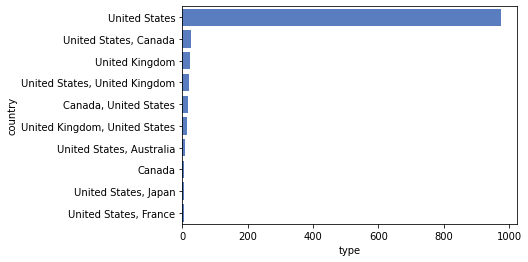

In [167]:
sns.set_color_codes("muted")
sns.barplot(x="type", y="country", data=c_countries_disney,
            label="Total", color="b")

In [168]:
c_countries_amazon = df_amazon.groupby("country").count()['type'].sort_values(ascending=False)[:15] 
c_countries_amazon

country
United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Italy                              8
Spain                              8
Canada, United States              7
United States, United Kingdom      6
India, United States               5
Germany                            5
Australia                          4
United States, Canada              4
United States, India               3
United States, France              3
Name: type, dtype: int64

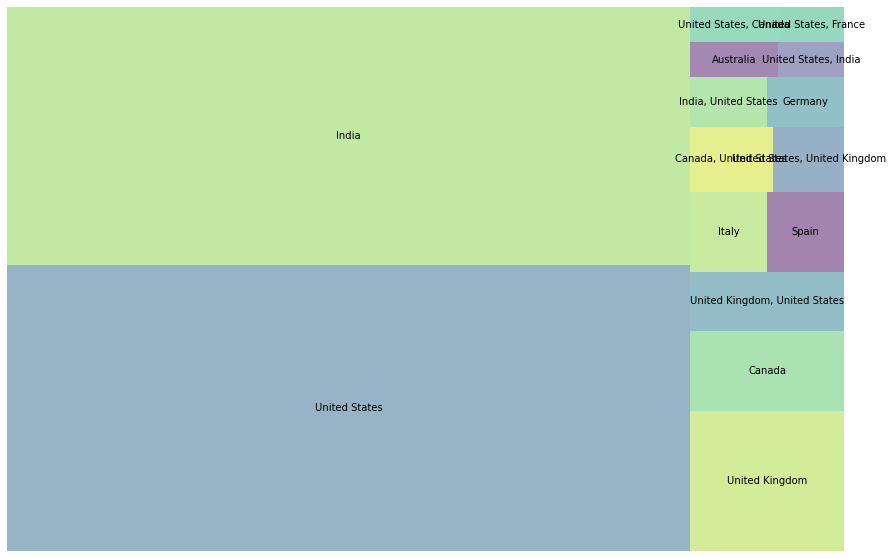

In [169]:
plt.figure(figsize=(15,10))

squarify.plot(sizes=c_countries_amazon.values,
             label=c_countries_amazon.index,
             alpha=.5)
             
plt.axis('off')
plt.show()

Queremos ver los tipos de producciones por cada una de las plataformas.

In [170]:
df_type = df_platforms.groupby(["type", "Platform"]).size().reset_index().pivot(columns="type", index="Platform", values=0)

df_type

type,Movie,TV,TV Show
Platform,,,
Amazon,7814.0,NaN,1854.0
Disney+,991.0,NaN,377.0
HBO,1712.0,375.0,NaN
Netflix,6131.0,NaN,2676.0


In [171]:
df_type["TV Show"] = np.where(df_type["TV Show"].isna(), 375.0, df_type["TV Show"])
df_type

type,Movie,TV,TV Show
Platform,,,
Amazon,7814.0,NaN,1854.0
Disney+,991.0,NaN,377.0
HBO,1712.0,375.0,375.0
Netflix,6131.0,NaN,2676.0


In [172]:
df_type = df_type.drop(["TV"], axis=1)

In [173]:
df_type

type,Movie,TV Show
Platform,,
Amazon,7814.0,1854.0
Disney+,991.0,377.0
HBO,1712.0,375.0
Netflix,6131.0,2676.0


<AxesSubplot:xlabel='Platform'>

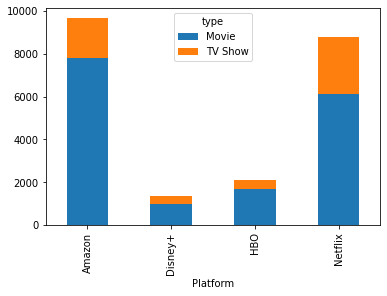

In [174]:
df_type.plot(kind="bar", stacked=True)

In [175]:
df_abonadosTV["Año"] = df_abonadosTV["Año"] + df_abonadosTV["Periodo"]

In [176]:
df_abonadosTV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   57 non-null     object 
 1   Periodo               57 non-null     object 
 2   Televisión IP         57 non-null     float64
 3   Televisión por cable  57 non-null     float64
 4   Televisión satélite   57 non-null     float64
 5   Televisión online     57 non-null     float64
 6   Televisión terrestre  57 non-null     float64
 7   TV móvil              57 non-null     float64
dtypes: float64(6), object(2)
memory usage: 4.0+ KB


In [177]:
df_abonadosTV.head(5)

df_abonados = df_abonadosTV.sort_values("Televisión IP", ascending=False)
df_abonadosTV

,Año,Periodo,Televisión IP,Televisión por cable,Televisión satélite,Televisión online,Televisión terrestre,TV móvil
0,2006Trimestre 1,Trimestre 1,247789.0,1070742.0,1985000.0,0.0,0.0,0.0
1,2006Trimestre 2,Trimestre 2,265193.0,1090271.0,1990000.0,0.0,0.0,0.0
2,2006Trimestre 3,Trimestre 3,304087.0,1107013.0,2006000.0,0.0,0.0,0.0
3,2006Trimestre 4,Trimestre 4,395855.0,1122221.0,2044000.0,0.0,0.0,0.0
4,2007Trimestre 1,Trimestre 1,435472.0,1123228.0,2065000.0,0.0,0.0,0.0
5,2007Trimestre 2,Trimestre 2,468940.0,1126846.0,2056002.0,0.0,0.0,0.0
6,2007Trimestre 3,Trimestre 3,490755.0,1130232.0,2046000.0,0.0,0.0,0.0
7,2007Trimestre 4,Trimestre 4,565006.0,1179375.0,2065000.0,0.0,0.0,0.0
8,2008Trimestre 1,Trimestre 1,636140.0,1236093.0,2080000.0,0.0,0.0,259376.0
9,2008Trimestre 2,Trimestre 2,676348.0,1279447.0,2078000.0,0.0,0.0,291374.0


In [178]:
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df_abonadosTV["Año"],
                    y = df_abonadosTV['Televisión IP'],
                    name = 'TV IP',
                    mode= 'lines',
                    marker = dict(color = 'cadetblue'),
                    text = df_abonadosTV)
trace2 = go.Scatter(
                    x = df_abonadosTV["Año"],
                    y = df_abonadosTV['Televisión por cable'],
                    name = 'TV Cable',
                    mode= 'lines+markers',
                    marker = dict(color = 'darkgrey'),
                    text = df_abonadosTV)

trace3 = go.Scatter(
                    x = df_abonadosTV["Año"],
                    y = df_abonadosTV['Televisión satélite'],
                    name = 'TV Satelite',
                    mode= 'lines+markers',
                    marker = dict(color = 'darkkhaki'),
                    text = df_abonadosTV)

trace4 = go.Scatter(
                    x = df_abonadosTV["Año"],
                    y = df_abonadosTV['Televisión online'],
                    name = 'TV OnLine',
                    mode= 'lines+markers',
                    marker = dict(color = 'blueviolet'),
                    text = df_abonadosTV)
trace5 = go.Scatter(
                    x = df_abonadosTV["Año"],
                    y = df_abonadosTV['Televisión terrestre'],
                    name = 'TV Terrestre',
                    mode= 'lines+markers',
                    marker = dict(color = 'darkorange'),
                    text = df_abonadosTV)
trace6 = go.Scatter(
                    x = df_abonadosTV["Año"],
                    y = df_abonadosTV['TV móvil'],
                    name = 'TV Movil',
                    mode= 'lines+markers',
                    marker = dict(color = 'black'),
                    text = df_abonadosTV)
data = [trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = "Abonados TV por modalidades",
             xaxis= dict(title= 'Abonados',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [179]:
df_evolumin["Año"] = df_evolumin["Año"] + df_evolumin["Periodo"]
df_evolumin

,Año,Periodo,Lineal+Diferido
0,2019Enero,Enero,247.0
1,2019Febrero,Febrero,240.0
2,2019Marzo,Marzo,233.0
3,2019Abril,Abril,233.0
4,2019Mayo,Mayo,223.0
5,2019Junio,Junio,215.0
6,2019Julio,Julio,197.0
7,2019Agosto,Agosto,184.0
8,2019Septiembre,Septiembre,211.0
9,2019Octubre,Octubre,219.0


In [180]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y = df_evolumin["Lineal+Diferido"],
        x = df_evolumin["Año"],
        mode = 'lines',
        marker = dict(color = 'rgba(16, 112, 2, 0.8)')
    ))
fig.show()

In [214]:
df_evoluTV["Año"] = df_evoluTV["Año"] + " " + df_evoluTV["Periodo"]

In [232]:
df_evoluTV

,Año,Periodo,TV de pago,"Plataformas tradicionales (Movistar TV, Vodafone TV, Euskatel TV, Jazztel, etc)","OTT'S (Netflix, Amazone Prime Video, HBO, etc)"
0,2015 Marzo,Marzo,"26,5","24,1",0
1,2015 Junio,Junio,"26,8","24,5",0
2,2015 Septiembre,Septiembre,"28,6",26,"0,1"
3,2016 Marzo,Marzo,"30,8",28,"0,5"
4,2016 Junio,Junio,"32,3","29,1","0,6"
5,2016 Septiembre,Septiembre,"33,5","29,9","1,2"
6,2017 Marzo,Marzo,"35,2","30,5","2,6"
7,2017 Junio,Junio,"35,9","30,2","4,1"
8,2017 Septiembre,Septiembre,"39,1","32,4","6,1"
9,2018 Marzo,Marzo,"43,7","33,6","20,4"


In [220]:
df_1 = df_evoluTV[["Año", "TV de pago"]]
df_2 = df_evoluTV[["Año", "Plataformas tradicionales (Movistar TV, Vodafone TV, Euskatel TV, Jazztel, etc)"]]
df_3 = df_evoluTV[["Año", "OTT'S (Netflix, Amazone Prime Video, HBO, etc)"]]

In [ ]:
px.histogram(df_evoluTV[""], 
  x="value column",
  color="column",
  facet_col="column")

In [231]:
trace1 = go.Histogram(
    x=df_evoluTV["Año"],
    opacity=1,
    name = "TV Pago",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x=df_evoluTV["Año"],
    xaxis='x2',
    opacity=0.75,
    name = "Tradicionales",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

trace3 = go.Histogram(
    x=df_evoluTV["Año"],
    xaxis='x3',
    opacity=0.9,
    name = "Netflix, Disney+, Amazon y HBO",
    marker=dict(color='rgb(171, 50, 96)'))

data = [trace1, trace2, trace3]
'''layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.30]
    ),
    xaxis2=dict(
        domain=[0.35, 0.65]
    ),
    xaxis3=dict(
        domain=[0.70, 1],
        anchor='y3'
    ),
    title = 'Evolución de la TV de pago)'''
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
fig = px.histogram(spfrit, 
 x=df_evoluTV["Año"],
 y=df_evoluTV["TV de pago"],
 color="color",
 barmode="group",
 title=f"Histnorm {histnorm} histogram",
 category_orders={"Country Name":["Italy","Spain","France"]},
 color_discrete_map="identity"
)
fig.show()

In [ ]:
df_evoluTV

,Año,Periodo,TV de pago,"Plataformas tradicionales (Movistar TV, Vodafone TV, Euskatel TV, Jazztel, etc)","OTT'S (Netflix, Amazone Prime Video, HBO, etc)"
0,2015Marzo,Marzo,"26,5","24,1",0
1,2015Junio,Junio,"26,8","24,5",0
2,2015Septiembre,Septiembre,"28,6",26,"0,1"
3,2016Marzo,Marzo,"30,8",28,"0,5"
4,2016Junio,Junio,"32,3","29,1","0,6"
5,2016Septiembre,Septiembre,"33,5","29,9","1,2"
6,2017Marzo,Marzo,"35,2","30,5","2,6"
7,2017Junio,Junio,"35,9","30,2","4,1"
8,2017Septiembre,Septiembre,"39,1","32,4","6,1"
9,2018Marzo,Marzo,"43,7","33,6","20,4"


In [ ]:
df_audiencias

,Cadena,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Sept.,Octubre,Noviembre,Diciembre,Media anual 2015,Media anual 2020
1,Antena 3,0.138,0.132,0.134,0.139,0.13,0.131,0.126,0.130,0.134,0.140,0.143,0.134,"13,4%*",11.8
2,La 1,0.104,0.102,0.1,0.099,0.099,0.097,0.090,0.090,0.097,0.100,0.097,0.102,"9,8%*",9.3
3,FORTA,0.077,0.077,0.075,0.075,0.076,0.078,0.072,0.074,0.074,0.077,0.075,0.072,"7,5%*",8.4
4,La Sexta,0.077,0.08,0.077,0.074,0.076,0.076,0.065,0.064,0.067,0.073,0.077,0.076,"7,4%*",7.0
5,Cuatro,0.073,0.075,0.075,0.072,0.073,0.072,0.071,0.073,0.074,0.067,0.067,0.068,"7,2%*",5.5
6,TEM PAGO,0.067,0.065,0.066,0.07,0.068,0.066,0.070,0.074,0.067,0.067,0.065,0.070,"6,8%*",8.4
7,FDF,0.038,0.036,0.035,0.036,0.036,0.035,0.038,0.040,0.036,0.033,0.031,0.033,"3,5%*",2.6
8,La 2,0.03,0.027,0.028,0.029,0.038,0.041,0.028,0.026,0.027,0.026,0.024,0.026,"2,7%*",2.8
9,Neox,0.026,0.027,0.027,0.026,0.025,0.025,0.025,0.027,0.025,0.025,0.025,0.024,"2,6%*",2.0
10,Nova,0.026,0.027,0.027,0.025,0.025,0.024,0.024,0.023,0.022,0.022,0.024,0.023,"2,4%*",2.5


In [ ]:
df_audiencias["Media anual 2015"] = df_audiencias["Media anual 2015"].str.replace("%", "")
df_audiencias["Media anual 2015"] = df_audiencias["Media anual 2015"].str.replace("*", "")

C:\Users\jorge\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
trace1 = go.Scatter(
                    x = df_audiencias["Cadena"],
                    y = df_audiencias["Media anual 2015"],
                    name = '2015',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df_audiencias)
trace2 = go.Scatter(
                    x = df_audiencias["Cadena"],
                    y = df_audiencias["Media anual 2020"],
                    name = '2020',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df_audiencias)

data1 = [trace1, trace2]

layout = dict(title = 'Audiencias TV',
             xaxis= dict(title= 'World Rank',ticklen= 5)
           )

fig = go.Figure(data = data1, layout=layout)

iplot(fig)

In [ ]:
df_publiTV = df_publi[df_publi["Medio"] == "Televisión"]

df_publiTV

,Medio,Mes,2019,2020,2021,% ev. 21/20,% ev. 21/19
1,Televisión,Enero,162.9,145.2,116.4,-19.8,-28.500
10,Televisión,Febrero,153.2,154.8,115.6,-0.253,-0.245
19,Televisión,Marzo,181.9,139.6,147.7,0.058,-0.188
28,Televisión,Abril,164.5,61.0,153.2,1.511,-0.069


In [ ]:
df_publi_ = df_publiTV.drop(1, axis=0)
df_publi_

,Medio,Mes,2019,2020,2021,% ev. 21/20,% ev. 21/19
10,Televisión,Febrero,153.2,154.8,115.6,-0.253,-0.245
19,Televisión,Marzo,181.9,139.6,147.7,0.058,-0.188
28,Televisión,Abril,164.5,61.0,153.2,1.511,-0.069


In [ ]:
fig = px.bar(df_publiTV, x='Mes', y= 2019, color = 2020,  title="Inversión publicitaria en TV")
fig.show()